# Paper graphs

## Time correction example (Figure 4)

In [76]:
import dscleaner as ds
with ds.FileInfo('../datasets/LP49.wav') as finfo:
    before_fixing = finfo.getSamples()
    with ds.FileUtil(finfo) as futil:
        futil.fix_duration(60)
        after_fixing = finfo.getSamples()
        with ds.FileWriter(finfo) as fw:
            fw.create_file('../datasets/LP49_fixed.wav')

In [214]:
df4 = pd.DataFrame(before_fixing[-1000:,0])
df5 = pd.DataFrame(before_fixing[-int(12800/50):,0])
df5.index += int(12800/52)*3
df6 = (list(df5.values)*4)
df6 = pd.DataFrame(df6)
df6.index += len(df4)

In [ ]:
df = pd.DataFrame(before_fixing[-1000:,1])
df2 = pd.DataFrame(before_fixing[-int(12800/50):,1])
df2.index += int(12800/52)*3
df3 = (list(df2.values)*4)
df3 = pd.DataFrame(df3)
df3.index += len(df)

### Final Plots

In [258]:
fig = plt.figure(figsize=(15,4))
x = np.arange(1, 2000)
plt.plot(df,color='tab:red')
plt.plot(df2,'--',color='tab:green')
plt.plot(df3,color='tab:blue')
plt.ylabel("Amperes")
plt.title("Time Correction: Current")
plt.xlabel("Samples")
plt.savefig("current_fixing.png", bbox_inches='tight')

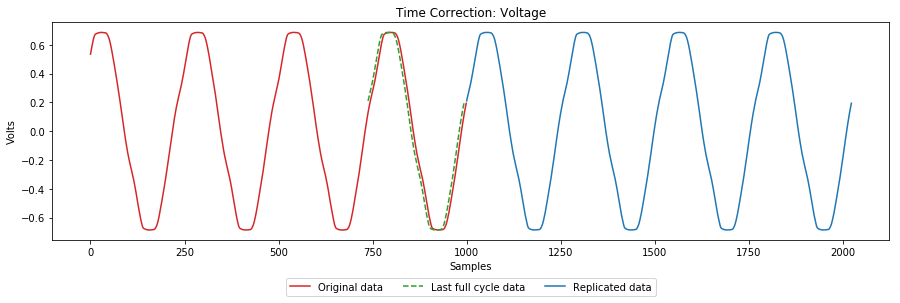

In [257]:
fig = plt.figure(figsize=(15,4))
x = np.arange(1, 2000)
plt.plot(df4,color='tab:red', label="Original data")
plt.plot(df5,'--',color='tab:green', label="Last full cycle data")
plt.plot(df6,color='tab:blue', label="Replicated data")
plt.legend(ncol=3,loc='lower center', bbox_to_anchor=(0.25, -0.28, 0.5, -0.5))
plt.ylabel("Volts")
plt.title("Time Correction: Voltage")
plt.xlabel("Samples")
plt.savefig("voltage_fixing.png", bbox_inches='tight')
plt.show()

## Resampling example (Figure 5)

### Resampling and creating the files

In [6]:
import matplotlib.pyplot as plt
import dscleaner as ds
original="../datasets/res_test.wav"
with ds.FileInfo(original) as finfo:
    print(finfo.getNumberOfFrames())
    with ds.FileUtil(finfo) as futil:
        sixteen=finfo.getSamples()
        with ds.FileWriter(finfo) as fw:
            futil.resample(6400)
            six = finfo.getSamples()
            fw.create_file("../datasets/res_6400.wav")
            futil.resample(3200)
            three = finfo.getSamples()
            fw.create_file("../datasets/res_3200.wav")
            futil.resample(12800)
            twelve = finfo.getSamples()
            fw.create_file("../datasets/res_12800.wav")

1000


In [71]:
data = sixteen #this varies from six to sixteen in order to get the graph

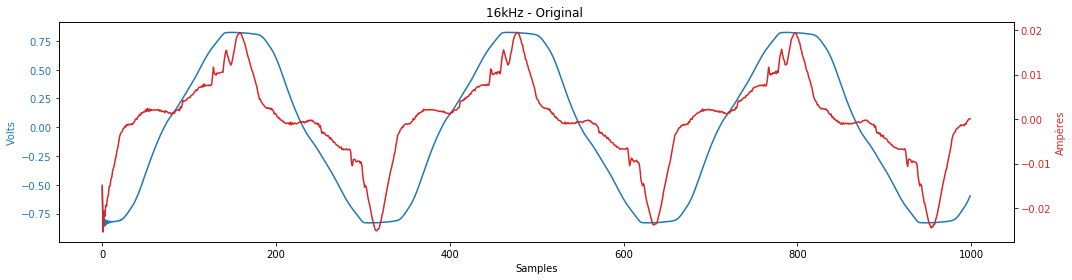

'plt.title("16kHz - Current")\nplt.plot(sixteen[:,0])\nplt.title("16kHz - Voltage")'

In [72]:

fig1, ax1 = plt.subplots(figsize=(15,4))
ax1.set_xlabel('Samples')
color = 'tab:blue'
plt.title("16kHz - Original ")

ax1.plot(data[:,0], color = color)
ax1.set_ylabel('Volts', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax12 = ax1.twinx()
color = 'tab:red'
ax12.set_ylabel('Ampères', color=color)
ax12.tick_params(axis='y', labelcolor=color)

ax12.plot(data[:,1], color = color)
fig1.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
"""plt.title("16kHz - Current")
plt.plot(sixteen[:,0])
plt.title("16kHz - Voltage")"""

## Normalization example (Figure 6)

### Creating the files for example

In [ ]:
import pandas as pd
import dscleaner as ds

import os
import time
start = time.time()
dir = "../datasets/BLUED/" 
datasets = os.listdir(dir)

for dataset in datasets:
    rel_ds_path = os.path.join(dir,dataset) #joins the path to the name
    dst_path = os.path.join(dst,dataset)
    if(os.path.isdir(rel_ds_path)):
        dir_content = os.listdir(rel_ds_path) #shows whats in the directory
        for f in dir_content:
            if f.endswith(".txt.bz2"): #since the files are still compressed and there are other stuff in the folders; I check for the extension .txt.bz2
                cur_file = os.path.join(dir,dataset,f) # create a valid path to file
                csv = pd.read_csv(filepath_or_buffer = cur_file, compression = "bz2", header = 22, usecols = ["Current A", "VoltageA"])
                csv.fillna(method = 'bfill', inplace = True) #remove any na values
                with ds.CsvFileInfo(csv.values,12000) as fileA: #while using non sound files the samplerate must be given
                    with ds.FileWriter(fileA) as fw:
                        fw.create_file('../datasets/BLUED_test/raw.wav')
                        with ds.FileUtil(fileA) as futil: #FileUtil class has several methods that allow for resampling and other stuff
                            futil.standardize() #since data is in normal values, the data should be standardized( be between -1 and 1)
                        fw.create_file('../datasets/BLUED_test/normalized.wav')
                break
    print("dataset processed:", dataset)
    break
print("Finished!")


### Creating the variables for plotting

In [24]:
import matplotlib.pyplot as plt
import dscleaner as ds
with ds.FileInfo('../datasets/raw.wav') as raw:
    with ds.FileInfo('../datasets/normalized.wav') as normalize:
        plt.plot(normalize.getSamples()[:200])
        plt.plot(raw.getSamples()[:200])

### Creating the plots

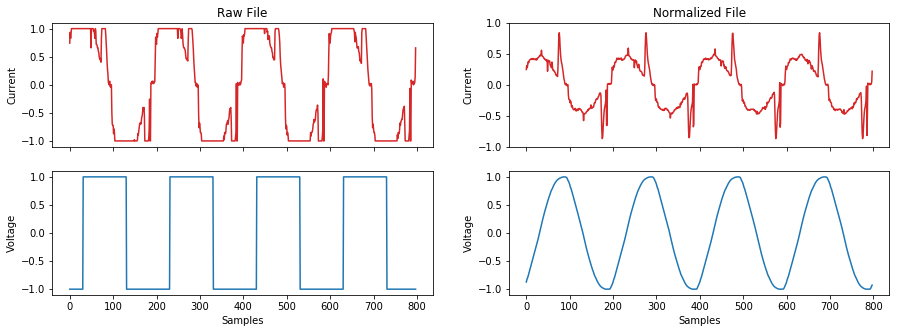

In [25]:
fig = plt.figure(figsize = (15,5))
ax1 = plt.subplot(2,2,1)
plt.title("Raw File")
plt.plot(raw.getSamples()[:399*2,0], label = 'Current', color='tab:red')
plt.ylabel('Current')
plt.subplot(2,2,3,sharex=ax1)
plt.plot(raw.getSamples()[:399*2,1], label = 'Voltage')
# make these tick labels invisible
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Voltage')
plt.xlabel('Samples')

ax1 = plt.subplot(2,2,2)
plt.title("Normalized File")
plt.plot(normalize.getSamples()[:399*2,0], label = 'Current', color='tab:red')
plt.ylim([-1,1])
plt.ylabel('Current')
plt.subplot(2,2,4,sharex=ax1)
plt.plot(normalize.getSamples()[:399*2,1], label = 'Voltage')
# make these tick labels invisible
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Voltage')
plt.xlabel('Samples')
#plt.legend(ncol=3,loc='lower center', bbox_to_anchor=(0.25, -0.40, 0.5, -0.5))
plt.show()
fig.savefig('normalize.pdf', bbox_inches='tight')